### **Basic Machine Leaning**

![picture](https://drive.google.com/uc?id=1eCrItZzJ59RfcGHOTyXtCsRaTQAppSbI)

### **Regression**

การประเมินความแม่นยำของโมเดล
*   Mean Absolute Error (MAE)
*   Mean Square Error (MSE)
*   Root Mean Square Error (RMSE): ถอดรูทรากที่สองของ MSE
*   Coefficient of Determination: ค่าสัมประสิทธิ์การตัดสินใจ หรือ R Squre มีค่าระหว่าง 0-1 ถ้ามีค่าเท่ากับ 1 แสดงว่าโมเดลมีความแม่นยำสูงสุด

In [ ]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
x_data = [1.0, 1.8, 3.0, 4.1, 5.2, 6.0]
y_data = [1, 1.3, 2.2, 2.5, 2.8, 3.6]

x = np.array(x_data) 
y = np.array(y_data)

#เปลี่ยนเป็นรูปแบบ Matrix 1 คอลัมน์
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [ ]:
x

array([[1. ],
       [1.8],
       [3. ],
       [4.1],
       [5.2],
       [6. ]])

In [ ]:
y

array([[1. ],
       [1.3],
       [2.2],
       [2.5],
       [2.8],
       [3.6]])

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
y_predict = model.predict(x)

In [ ]:
MAE = mean_absolute_error(y, y_predict)
MAE

0.12421541810053253

In [ ]:
MSE = mean_squared_error(y, y_predict)
MSE

0.02437424630136185

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

0.15612253617387162

In [ ]:
#R square
#ใช้ .score() โดยพารามิเตอร์ คือ x และ y (ข้อมูลจริง)
model.score(x, y)

0.9685718887231725

In [ ]:
#ใช้ r2_score() โดยพารามิเตอร์ คือ y (ข้อมูลจริง) กับ y_predict (ที่ได้จากการทำนายด้วยโมเดล)
r2 = r2_score(y, y_predict)
r2

0.9685718887231725

### **Simple Linear Regression**

การศึกษาความสัมพันธ์ของตัวแปร 2 ตัว ซึ่งมีความสัมพันธ์เป็นเชิงเส้นตรง
*   **ตัวแปรอิสระ** (Independent Variable, Input หรือ Predictor) มักใช้สัญลักษณ์ x เป็นค่าที่กำหนดตั้งต้นเพื่อหาค่าเป้าหมายหรือค่าประมาณการ (y)
*   **ตัวแปรตาม** (Dependent Variable, Output หรือ Response) มักใช้สัญลักษณ์ y หมายถึงค่าที่ผันแปรตามตัวแปรอิสระ เช่น เมื่อลงทุนโฆษณา (x) มากขึ้น จะทำให้ได้กำไร (y) สูงขึ้น

`y = m * x + b`
*   y คือค่าที่ต้องการหา
*   x คือค่าตั้งต้น หรือค่าที่กำหนดเพื่อนำไปหาค่า y
*   m (slope) คือค่าความชันของเส้นตรง จะบ่งบอกความสัมพันธ์ของทั้งสองตัวแปร
*   b (intercept) คือจุดตัดบนแกน y เมื่อ x เป็นศูนย์ หมายถึงถ้า x = 0 ค่า y จะมีค่าเท่ากับ b

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#mount it once
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


![picture](https://drive.google.com/uc?id=1NGlFDXUeCA2fQrfNVwEHdd18hFbiP8qA)

In [19]:
filepath = '/content/drive/MyDrive/CT526_Colab_Workbook/advertising.csv'
df = pd.read_csv(filepath, encoding='utf-8', usecols=['TV','Sales'])
df.head()

TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9

**(1) ตั้งคำถาม**
*   มีความสัมพันธ์ระหว่างการลงทุนโฆษณา TV กับจำนวนสินค้าที่ขายได้หรือไม่
*   ทำนายยอดขายเมื่อลงทุนโฆษณา TV มูลค่า 300, 500, 1000 (หน่วย x1000)

**(2) ตรวจสอบข้อมูล**



In [20]:
df.dtypes

TV       float64
Sales    float64
dtype: object

In [21]:
df.describe()

TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000

In [22]:
#นับจำนวนข้อมูลว่ามีกี่แถว กี่คอลัมน์
df.shape

(200, 2)

In [23]:
#ตรวจสอบว่ามีข้อมูล Missing data หรือไม่
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [24]:
#เปลี่ยนเป็นรูปแบบ Matrix 1 คอลัมน์
x = df.TV.values.reshape(-1,1)
x[:5]

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8]])

In [25]:
#เปลี่ยนเป็นรูปแบบ Matrix 1 คอลัมน์
y = df.Sales.values.reshape(-1,1)
y[:5]

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9]])

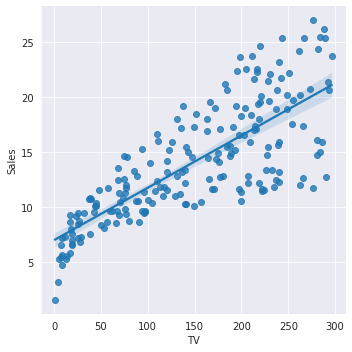

In [26]:
sns.set_style('darkgrid')
sns.lmplot(x='TV', y='Sales', data=df)
plt.show()

**(3) สร้างโมเดล**

In [27]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [28]:
#ดูค่า m และ b
model.coef_ , model.intercept_  

(array([[0.04753664]]), array([7.03259355]))

จะได้สมการเส้นตรงดังนี้ 
`y = (0.0475 * x) + 7.0326`
*   ค่า m (slope) มีค่า 0.0475 หมายความว่า ถ้าลงทุนโฆษณา TV เพิ่ม 1 หน่วย จะส่งเสริมการขายสินค้าเพิ่มขึ้น 0.0475 หน่วย
*   ค่า b (intercept) มีค่า 7.0326 หมายความว่า ถ้าไม่ลงทุนโฆษณา TV เลย จะขายสินค้าได้ 7.0326 หน่วย

**(4) ประเมินความแม่นยำ หรือค่าคลาดเคลี่อนของโมเดล**

In [29]:
y_predict = model.predict(x)

In [30]:
MAE = mean_absolute_error(y, y_predict)
MAE

2.549806038927486

In [31]:
MSE = mean_squared_error(y, y_predict)
MSE

10.512652915656757

In [32]:
RMSE = np.sqrt(MSE)
RMSE

3.2423221486546887

In [33]:
r2_score(y, y_predict)

0.611875050850071

**(5) การนำโมเดลไปใช้งาน**

เมื่อลงทุนโฆษณา TV มูลค่า 300, 500, 1000 (หน่วย x1000) จะส่งเสริมการขายสินค้าเพิ่มขึ้นประมาณ 21, 30 และ 54 (หน่วย x1000)

In [34]:
x_input = [[300], [500], [1000]]

y_predict = model.predict(x_input)
y_predict

array([[21.29358568],
       [30.80091377],
       [54.56923398]])

### **Multiple Linear Regression**
การศึกษาความสัมพันธ์ของตัวแปร 2 ตัวขึ้นไป `y = m1*x1 + m2*x2 + ... + mn*xn + b`

In [35]:
df = pd.read_csv(filepath, encoding='utf-8', index_col=0)
df.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

**(1) ตั้งคำถาม**
*   มีความสัมพันธ์ระหว่างการลงทุนโฆษณา กับจำนวนสินค้าที่ขายได้หรือไม่
*   ความสัมพันธ์ของยอดขายกับโฆษณาแต่ละสื่อเป็นอย่างไรบ้าง
*   ทำนายยอดขายเมื่อลงทุนโฆษณามูลค่าต่าง ๆ

**(2) ตรวจสอบข้อมูล**

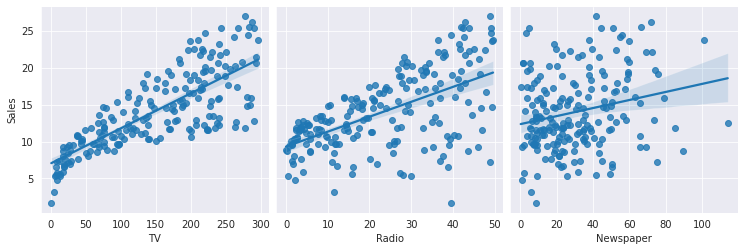

In [36]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=3.5, kind='reg')
plt.show()

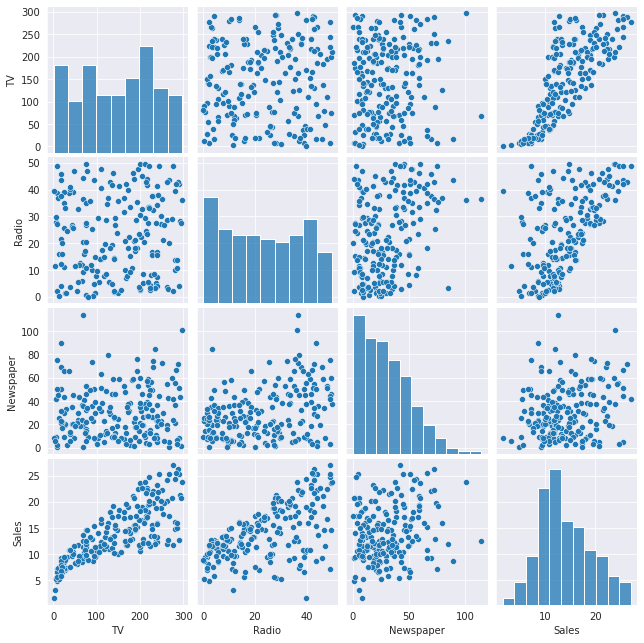

In [37]:
g = sns.pairplot(df)
g.fig.set_size_inches(9, 9)

**(3) สร้างโมเดล**

In [ ]:
feature_cols = ['TV','Radio','Newspaper']
x = df[feature_cols]
y = df.Sales

In [ ]:
model = LinearRegression()
model.fit(x, y)

In [ ]:
print(model.coef_)
print(model.intercept_)

**(4) ประเมินความแม่นยำ หรือค่าคลาดเคลี่อนของโมเดล**

In [ ]:
model.score(x, y)

**(5) การนำโมเดลไปใช้งาน**

In [ ]:
x_input = [[300, 0, 0], [0, 300, 0], [0, 0, 300], [100, 200, 200], [100, 200, 0]]
model.predict(x_input)

![picture](https://drive.google.com/uc?id=12Hs_gJrsQl6RZ_op7ujtlGNHE7I_52fw)

### **Polynomial Regression**

ความสัมพันธ์ระหว่างตัวแปรไม่ได้เป็นเส้นตรง

![picture](https://drive.google.com/uc?id=1dcKBOhKU-Oh10bQ6d3tmd6TbvrcseWh-)

In [ ]:
filepath = '/content/drive/MyDrive/CT526_Colab_Workbook/ML_Dataset01/gdp4c.csv'
df = pd.read_csv(filepath, encoding='utf-8', index_col=0)
df.tail()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(df.index, df.THA, label='THA')
#sns.scatterplot(df.index, df.USA, label='USA')
sns.scatterplot(df.index, df.SGP, label='SGP')
sns.scatterplot(df.index, df.VNM, label='VNM')

plt.ylabel('GDP')
plt.show()

In [ ]:
x = df.index.values.reshape(-1,1)
y = df.THA

In [ ]:
x[:5]

In [ ]:
y[:5]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)    #Degree ยกกำลัง 2
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

In [ ]:
y_poly_pred = model.predict(x_poly)

print('R2 = {:.5f} '.format(model.score(x_poly, y)))
print('R2 = {:.5f} '.format(r2_score(y, y_poly_pred)))

print('MSE = {:.4e} '.format(mean_squared_error(y, y_poly_pred)))
print('RMSE = {:.4e} '.format(np.sqrt(mean_squared_error(y,  y_poly_pred))))

In [ ]:
x_input = [[2015], [2018], [2020]]
y_poly_pred = model.predict(poly_features.fit_transform(x_input))
y_poly_pred

for val in y_poly_pred:
    print('{:.4e}'.format(val))